In [1]:
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import glob
import math

In [2]:
notebook_path = os.path.abspath("Cifer10_classification.ipynb")
path0 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images\\train\\airplane")
path1 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images\\train\\automobile")
path2 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images\\train\\bird")
path3 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images\\train\\cat")
path4 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images\\train\\deer")
path5 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images\\train\\dog")
path6 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images\\train\\frog")
path7 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images\\train\\horse")
path8 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images\\train\\ship")
path9 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images\\train\\truck")

In [3]:
train_sample = []
train_labels = []

def readImage(path,label_name,sample,label):
    for img in glob.glob(path+"\\*.jpg"):
        n = cv.imread(img)
        sample.append(n)
        label.append(label_name)

In [4]:
readImage(path0,0,train_sample,train_labels)
readImage(path1,1,train_sample,train_labels)
readImage(path2,2,train_sample,train_labels)
readImage(path3,3,train_sample,train_labels)
readImage(path4,4,train_sample,train_labels)
readImage(path5,5,train_sample,train_labels)
readImage(path6,6,train_sample,train_labels)
readImage(path7,7,train_sample,train_labels)
readImage(path8,8,train_sample,train_labels)
readImage(path9,9,train_sample,train_labels)

In [5]:
train_sample = np.array(train_sample)
train_labels = np.array(train_labels)
train_labels,train_sample = shuffle(train_labels,train_sample)

In [6]:
train_sample.shape

(50000, 32, 32, 3)

In [7]:
path0 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images\\test\\airplane")
path1 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images\\test\\automobile")
path2 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images\\test\\bird")
path3 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images\\test\\cat")
path4 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images\\test\\deer")
path5 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images\\test\\dog")
path6 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images\\test\\frog")
path7 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images\\test\\horse")
path8 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images\\test\\ship")
path9 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images\\test\\truck")

In [8]:
test_sample = []
test_labels = []

readImage(path0,0,test_sample,test_labels)
readImage(path1,1,test_sample,test_labels)
readImage(path2,2,test_sample,test_labels)
readImage(path3,3,test_sample,test_labels)
readImage(path4,4,test_sample,test_labels)
readImage(path5,5,test_sample,test_labels)
readImage(path6,6,test_sample,test_labels)
readImage(path7,7,test_sample,test_labels)
readImage(path8,8,test_sample,test_labels)
readImage(path9,9,test_sample,test_labels)

In [9]:
test_sample = np.array(test_sample)
test_labels = np.array(test_labels)
test_labels,test_sample = shuffle(test_labels,test_sample)

In [10]:
test_sample.shape

(10000, 32, 32, 3)

In [189]:
def kNearestNeighbor(test,k):
    n = []
    train = train_sample.reshape(50000,3072).astype(np.int64)
    test = test.reshape(3072).astype(np.int64)
    
    for i in range(0,10000):
        d = sum(np.square((train[i]-test)))
        n.append(d)
    
    n = np.array(n)
    nn = np.argsort(n)
    nn = nn[0:k]
    pred = train_labels[nn]
    count = []
    
    for i in range(10):
        c = np.where(np.equal(pred,i))
#         print(c)
        count.append(np.array(c).size)
        
    if k<=2:
        pred = pred[0]
    if k>2:
        class_ = np.where(np.equal(count,np.amax(count)))
        pred = class_[0][0]
                    
                  
    return pred

In [192]:
count = 0
acc = 0
accuracy = []
pred = []

for k in range(1,21):
    print(f'For K={k}\n')
    count=0
    for i in range(100):        
        n = kNearestNeighbor(test_sample[i],k)
#         print(f'Test {i}')
        if (test_labels[i] == n):
            count+=1
    acc = (count*100)/100
    accuracy.append(acc)
    print(f"Count: {count}; Accuracy: {acc};")

For K=1

Count: 29; Accuracy: 29.0;
For K=2

Count: 29; Accuracy: 29.0;
For K=3

Count: 29; Accuracy: 29.0;
For K=4

Count: 32; Accuracy: 32.0;
For K=5

Count: 32; Accuracy: 32.0;
For K=6

Count: 29; Accuracy: 29.0;
For K=7

Count: 29; Accuracy: 29.0;
For K=8

Count: 27; Accuracy: 27.0;
For K=9

Count: 29; Accuracy: 29.0;
For K=10

Count: 28; Accuracy: 28.0;
For K=11

Count: 30; Accuracy: 30.0;
For K=12

Count: 27; Accuracy: 27.0;
For K=13

Count: 31; Accuracy: 31.0;
For K=14

Count: 31; Accuracy: 31.0;
For K=15

Count: 31; Accuracy: 31.0;
For K=16

Count: 31; Accuracy: 31.0;
For K=17

Count: 31; Accuracy: 31.0;
For K=18

Count: 30; Accuracy: 30.0;
For K=19

Count: 31; Accuracy: 31.0;
For K=20

Count: 31; Accuracy: 31.0;


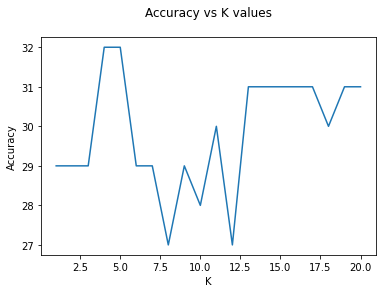

In [193]:
accuracy = np.array(accuracy)
k = np.arange(1,21)

plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.title("Accuracy vs K values\n")
plt.plot(k,accuracy)
plt.show()

The results show that K value can impact the prediction greatly. K is a hyperparameter so it can not be told early on which value would work the best. But for this CIFAR 10 dataset a value between 4-6 seems to be working best.

This approach takes a lot of time and is not effective enough to predict the images. That is why deep learning methods are used which can increase effeciency of image prediction